# Preliminaries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pickle

In [2]:
%matplotlib inline

Make plots much bigger

In [3]:
plt.rcParams['figure.figsize'] = [13.5, 9.]
plt.rcParams['font.size'] = 24

# Read All Data

In [4]:
data_tree_dir = ('../raw_data')

In [5]:
basic_run_info = {}
run_info_keys = ['tf_seed', 'num_steps', 'num_initial_features', 'np_seed', 
                 'learning_algorithm', 'learning_rate', 'batch_size', 
                 'num_compressed_features', 'time']

learning_curve_info = {}
learning_curve_info_keys = ['step_numbers', 'loss_function_values']

basic_matrices = {}
tied_matrices = {}
untied_matrices = {}

for dir_name, subdirs, file_names in os.walk(data_tree_dir):
    for file_name in file_names:
        if 'run-' in file_name and '.pickle' in file_name:
            pathname = os.path.join(dir_name, file_name)
            with open(pathname, 'rb') as pickle_file:
                run_dict = pickle.load(pickle_file)
                basic_run_info[pathname] = {}
                learning_curve_info[pathname] = {}
                for key in run_info_keys:
                    if key in run_dict:
                        basic_run_info[pathname][key] = run_dict[key]
                for key in learning_curve_info_keys:
                    if key in run_dict:
                        learning_curve_info[pathname][key] = run_dict[key]
                if 'W' in run_dict:
                    if 'b1' in run_dict:
                        tied_matrices[pathname] = {'W': run_dict['W']}
                        tied_matrices[pathname]['b1'] = run_dict['b1']
                        tied_matrices[pathname]['b2'] = run_dict['b2']
                    else:
                        basic_matrices[pathname] = {'W': run_dict['W']}
                else:
                    untied_matrices[pathname] = {
                        'W1': run_dict['W1'],
                        'W2': run_dict['W2'],
                        'b1': run_dict['b1'],
                        'b2': run_dict['b2']
                    }

# Exploring All Parameters

## Constant Parameters

In [6]:
constant_parameters = {
    'tf_seed': 1,
    'np_seed': 1,
    'batch_size': 16,
    'num_initial_features': 784
}

for run_dict in basic_run_info.values():
    for key, value in constant_parameters.items():
        if run_dict[key] != value:
            print('Varied', key, run_dict[key])

## Non-Constant "Basic" Parameters + Wall Clock Time

In [7]:
[r for r in run_info_keys if r not in constant_parameters]

['num_steps',
 'learning_algorithm',
 'learning_rate',
 'num_compressed_features',
 'time']

### num_steps versus [wall clock] time

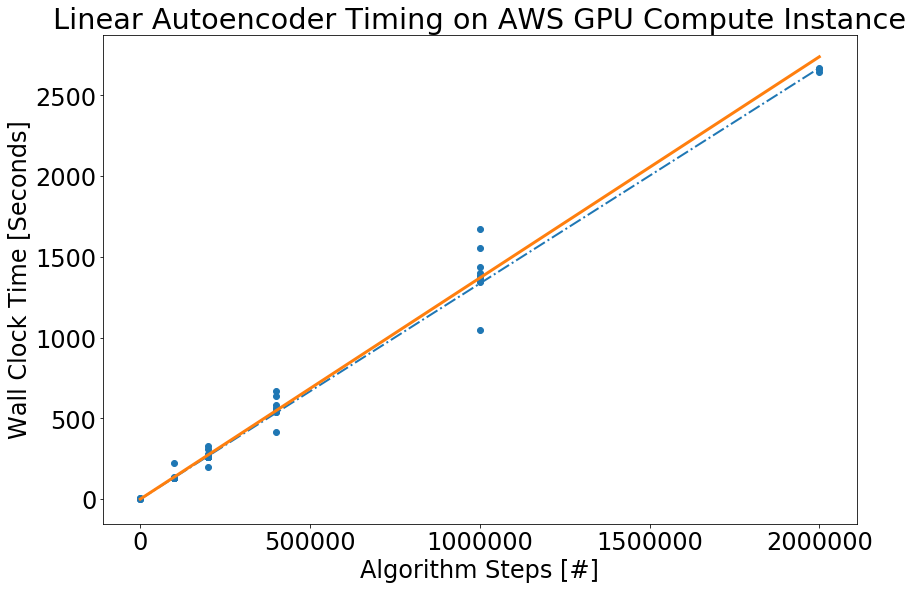

In [19]:
time_data = np.array([(d['num_steps'], d['time']) for d in basic_run_info.values()])
num_steps = time_data[:,0]
time = time_data[:,1]

plt.plot([0, max(num_steps)], [0, max(time)], lw = 2, ls = '-.') 
plt.plot([0, max(num_steps)], [0, sum(time)/sum(num_steps) * max(num_steps)], lw = 3)

plt.scatter(num_steps, time)

plt.xlabel('Algorithm Steps [#]')
plt.ylabel('Wall Clock Time [Seconds]')

plt.xticks([0, 500000,1000000,1500000,2000000])

plt.title('Linear Autoencoder Timing on AWS GPU Compute Instance')

            
print()

## Learning Curves vs. Learning Rate, Adam

## Learning Curves for all the other data points

## Performance vs. num_compressed_features for the 3 algorithms

# Visual Check of Autoencoder performance

# Make Dicts of Autoencoder Matrices